# Training a Linear Regression model to predict the price of cars based on their features

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("use_case_used_cars.xls") #Loading the dataset
df.head(20) #displaying first 20 rows

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
5,Buick LeSabre,5788,18,3.0,4.0,21,3670,218,43,231,2.73,Domestic
6,Buick Opel,4453,26,NaN,3.0,10,2230,170,34,304,2.87,Domestic
7,Buick Regal,5189,20,3.0,2.0,16,3280,200,42,196,2.93,Domestic
8,Buick Riviera,10372,16,3.0,3.5,17,3880,207,43,231,2.93,Domestic
9,Buick Skylark,4082,19,3.0,3.5,13,3400,200,42,231,3.08,Domestic


# Data Cleaning

In [4]:
#checking for all the null values

print(df.isnull().sum())

make            0
price           0
mpg             0
rep78           5
headroom        0
trunk           0
weight          0
length          0
turn            0
displacement    0
gear_ratio      0
foreign         0
dtype: int64


In [5]:
#To Handle the NaN, dropna is also an option, however we can lose important data so instead:using fillna

df = df.fillna(0) #filling the NaN with 0's
df.head(10)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,0.0,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
5,Buick LeSabre,5788,18,3.0,4.0,21,3670,218,43,231,2.73,Domestic
6,Buick Opel,4453,26,0.0,3.0,10,2230,170,34,304,2.87,Domestic
7,Buick Regal,5189,20,3.0,2.0,16,3280,200,42,196,2.93,Domestic
8,Buick Riviera,10372,16,3.0,3.5,17,3880,207,43,231,2.93,Domestic
9,Buick Skylark,4082,19,3.0,3.5,13,3400,200,42,231,3.08,Domestic


In [6]:
#Renaming the column 'make', to car_brand and 'foreign' to origin

df.rename(columns={'make': 'Car_brand'}, inplace=True)
df.rename(columns={'foreign': 'origin'}, inplace=True)

print(df.head())



       Car_brand  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0    AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1      AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   
2     AMC Spirit   3799   22    0.0       3.0     12    2640     168    35   
3  Buick Century   4816   20    3.0       4.5     16    3250     196    40   
4  Buick Electra   7827   15    4.0       4.0     20    4080     222    43   

   displacement  gear_ratio    origin  
0           121        3.58  Domestic  
1           258        2.53  Domestic  
2           121        3.08  Domestic  
3           196        2.93  Domestic  
4           350        2.41  Domestic  


# Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

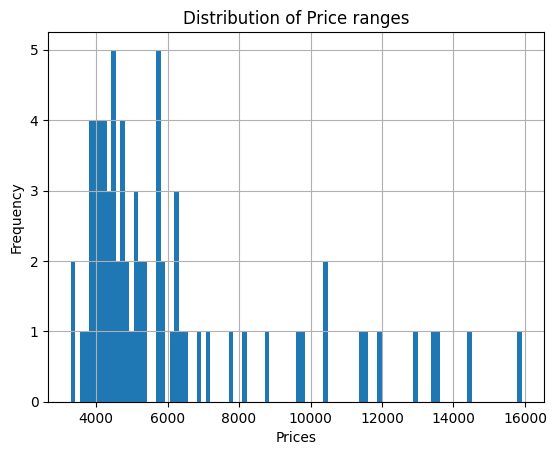

In [8]:
# To check, which price range is most common/popular

df['price'].hist(bins=100)
plt.title('Distribution of Price ranges')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

### The correlation analysis below is used to visualize the relationships between the various columns and the price column. It helps to understand which features are most strongly associated with the price.

In [9]:
#dropping the strings columns here, since the features are sigificant. 
#If brand and origin, to be used, I would use one hot encoding however can be a complex problem again
df_new = df.drop(['Car_brand', 'origin'], axis=1)

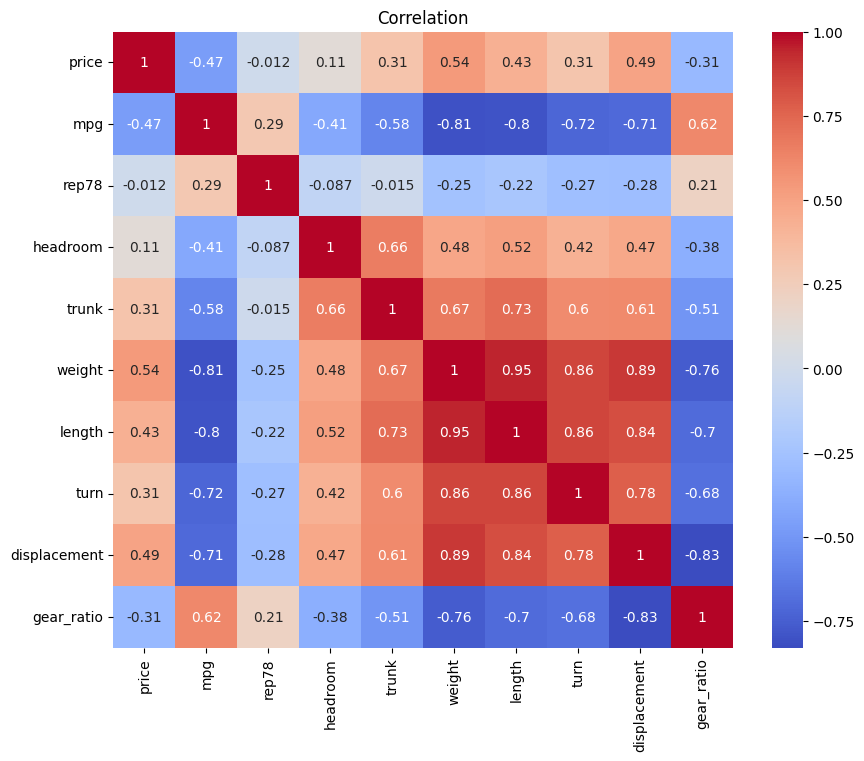

In [10]:
# To visualize the correlations between columns from dataset


plt.figure(figsize=(10, 8))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()


### Regression analysis to express the relationship between the car’s characteristics and its price and hence to identify which features are the most significant price drivers. Choosing linear regression, depending upon the nature of the problem i.e.  assumption of a linear relationship between features and the target variable. 


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder



X = df_new.drop('price', axis=1)  # where 'price' is the target variable
y = df_new['price']

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Absolute Error: 2164.4521102442727
R^2 Score: 0.4176740752594087
              Coefficient
mpg           -141.343848
rep78          426.051587
headroom      -645.555317
trunk           44.286347
weight           2.614892
length         -41.854086
turn          -185.670394
displacement    16.394569
gear_ratio    2415.354162


Conclusion: The gear_ratio feature has the highest coefficient in the regression model, indicating a strong influence on car price 

# Predicting the price of new cars based on its features now


In [12]:
new_car = pd.DataFrame({       
    'mpg': [25],             
    'rep78': [4],           
    'headroom': [5.0],      
    'trunk': [12],           
    'weight': [3000],        
    'length': [180],         
    'turn': [40],            
    'displacement': [150],  
    'gear_ratio': [3.5],     
         
})

# Using our trained model to predict the price
predicted_price = model.predict(new_car)
print(f"Recommended Price for the New Car: ${predicted_price[0]:.2f}")


Recommended Price for the New Car: $5134.29


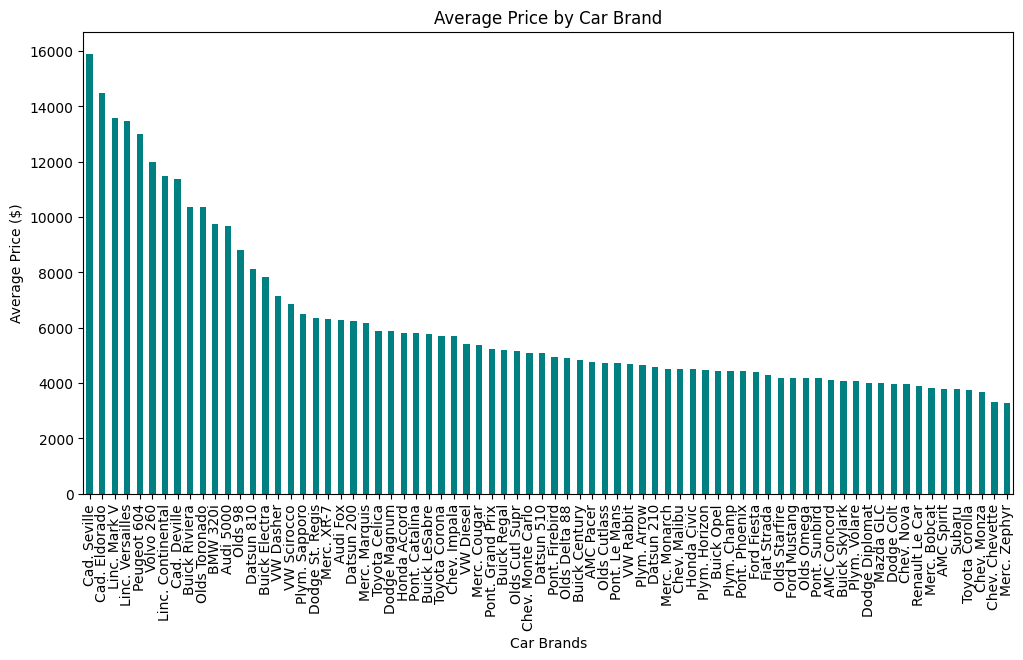

In [18]:
# Group by brand to find average price
avg_price_by_brand = df.groupby('Car_brand')['price'].mean().sort_values(ascending=False)

# Visualize average price by brand
plt.figure(figsize=(12, 6))
avg_price_by_brand.plot(kind='bar', color='teal')
plt.title('Average Price by Car Brand')
plt.xlabel('Car Brands')
plt.ylabel('Average Price ($)')
plt.show()




# Price Segmentation

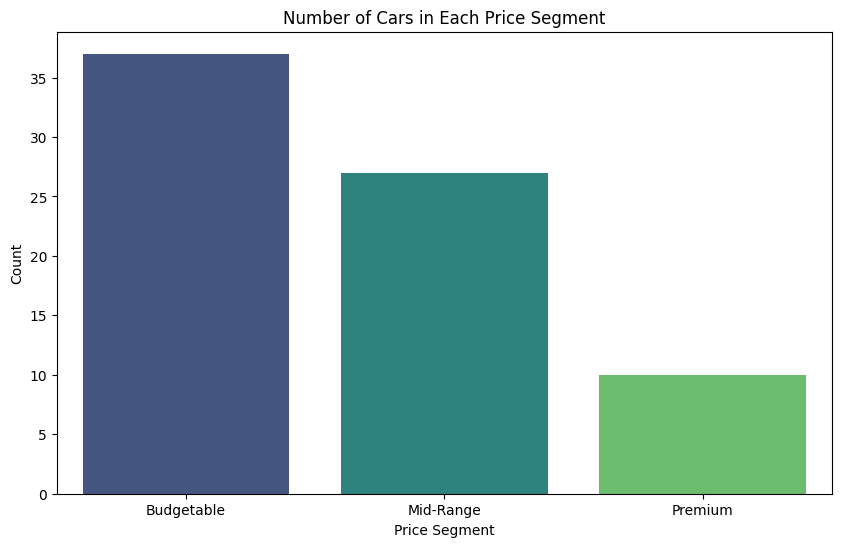

In [20]:
# Adding a price segmentation
df['Price_Segment'] = pd.cut(df['price'], bins=[0, 5000, 10000, 20000], labels=['Budgetable', 'Mid-Range', 'Premium'])

# Visualizing the count of cars in each price segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Price_Segment', hue='Price_Segment', palette='viridis', legend=False)
plt.title('Number of Cars in Each Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.show()


# Demand Prediction
Through the existing data is for cars, we can simulate a demand prediction

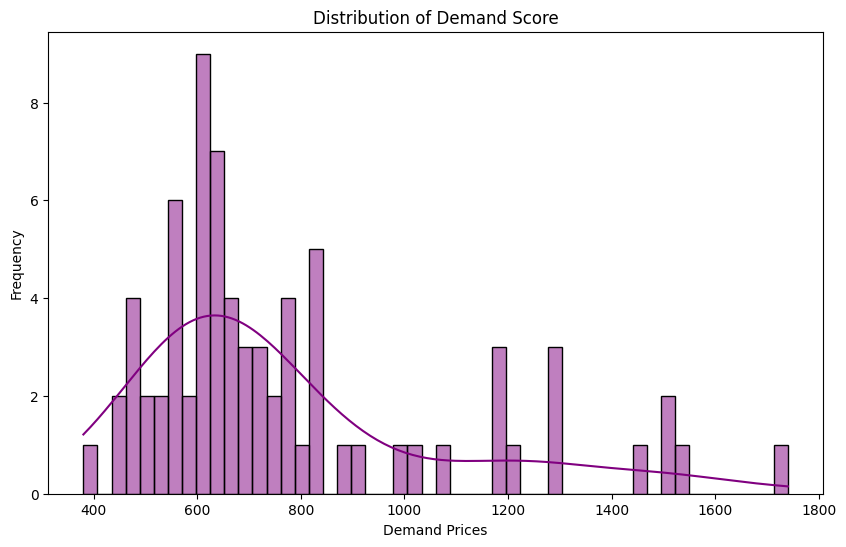

In [24]:
# Simulating a demand score based on price and popularity
df['Demand_Score'] = df['price'] * 0.1 + df['rep78'] * 50  # Hypothetical formula

# Visualizing the demand score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Demand_Score'], bins=50, kde=True, color='purple')
plt.title('Distribution of Demand Score')
plt.xlabel('Demand Prices')
plt.ylabel('Frequency')
plt.show()
